In [2]:
import numpy as np
# Get the muon caused background:
# Count rate: 7 +- 2 
# Efficiency veto: 56.1 +- 0.3 %.
# Efficiency pulse shape analysis: 88.8 +- 9.6 %.
# Efficiency coincidences: 80 +- 8 %.
np.log10(93e-3 * 4570 * 365 * 24 * 3600 / np.log(2))
print(np.sqrt((0.08 * (1 - 0.888) * (1 - 0.56) * 7)**2 +
        ((1 - 0.80) * 0.096 * (1 - 0.56) * 7)**2 +
        ((1 - 0.80) * (1 - 0.888) * 0.003 * 7)**2 +
        ((1 - 0.80) * (1 - 0.888) * (1 - 0.56) * 2)**2))
print((1 - 0.80) * (1 - 0.888) * (1 - 0.56) * 7)

0.06817209169740941
0.06899199999999997


[2.49305485]
[97.00694515]


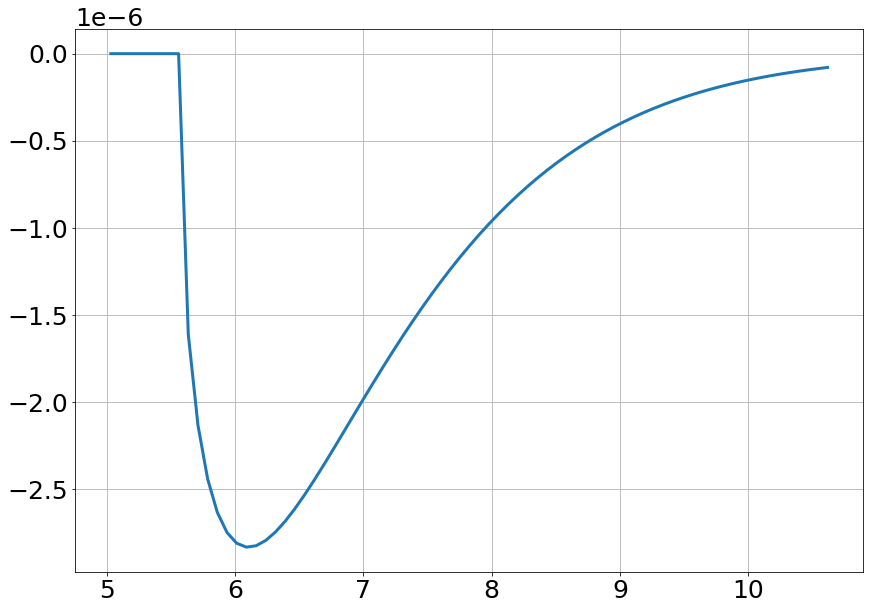

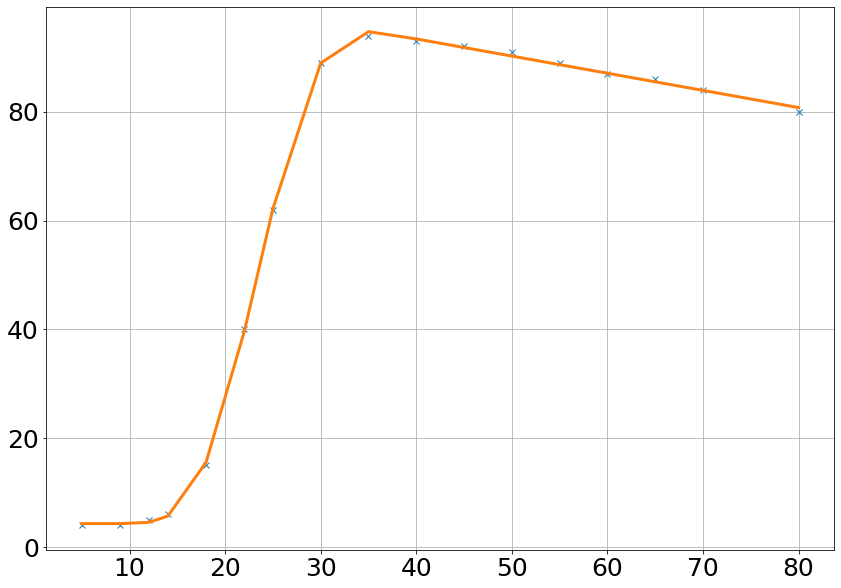

[ 32.74250783   7.19549564 101.72511969  -0.31551908   4.28016156]


<Figure size 1017.36x718.934 with 0 Axes>

In [24]:
from scipy.stats import beta
from scipy.special import comb

def smoothstep(x, width, dx, a):
    _x = np.clip((x - dx) / width, 0, 1)

    result = 0
    N = 5
    for n in range(0, N + 1):
         result += comb(N + n, n) * comb(2 * N + 1, N - n) * (-_x) ** n

    result *= _x ** (N + 1)

    return a * result

def pol2(x, width, dx, a, b, c):
    return (a + b * x) * smoothstep(x, width, dx, 1) + c
p0 = [15, 20, 20, 1, 1]


SCALE = 26.2
MAXP = smoothstep(SCALE, 30.14386, -6.79640, 1) * (
        76.37270 + 0.30974 * SCALE - 0.00412 * SCALE**2)
PSHIFT = smoothstep(SCALE, 18.0561, 14.3944, 68.6667)

P_LENGTH = 80
P5_LEN = P_LENGTH - 5
P_RANGE = range(P_LENGTH)
P5_RANGE = range(P5_LEN)
PERCENTAGES = np.linspace(PSHIFT, MAXP, P_LENGTH)


OUT_PER = PERCENTAGES[2:-3]
X_OUT = 0.01 * (-OUT_PER + 100.) * SCALE
FIT_PER = -OUT_PER / OUT_PER[-1]

def beta_fit(x, a, b, s, dx):
        return -s * beta.pdf(x + dx / 100., a, b)

dx = 97.5
data =  beta_fit(FIT_PER, 1.5, 20., 2.81893267e-07, dx)
print(dx + 100 * FIT_PER[data == data.min()])
print(2. - 100 * FIT_PER[data == data.min()])
plt.plot(X_OUT, data)
plt.show()
plt.clf()

lim_data = np.array([[5, 4], [9, 4], [12, 5], [14, 6], [18, 15], [22, 40],
                    [25, 62], [30, 89], [35, 94], [40, 93], [45, 92], 
                    [50, 91], [55, 89], [60, 87], [65, 86], [70, 84],
                    [80, 80]])
popt, _ = curve_fit(pol2, lim_data[:,0], lim_data[:,1], p0=p0)
plt.plot(lim_data[:,0], lim_data[:,1], "x")
plt.plot(lim_data[:,0], pol2(lim_data[:,0], *popt))
plt.show()
plt.clf()
print(popt)

[ 3.66847877e+01 -9.55026545e+00  8.62136053e+01 -3.48365452e-01
  6.20968362e-03]


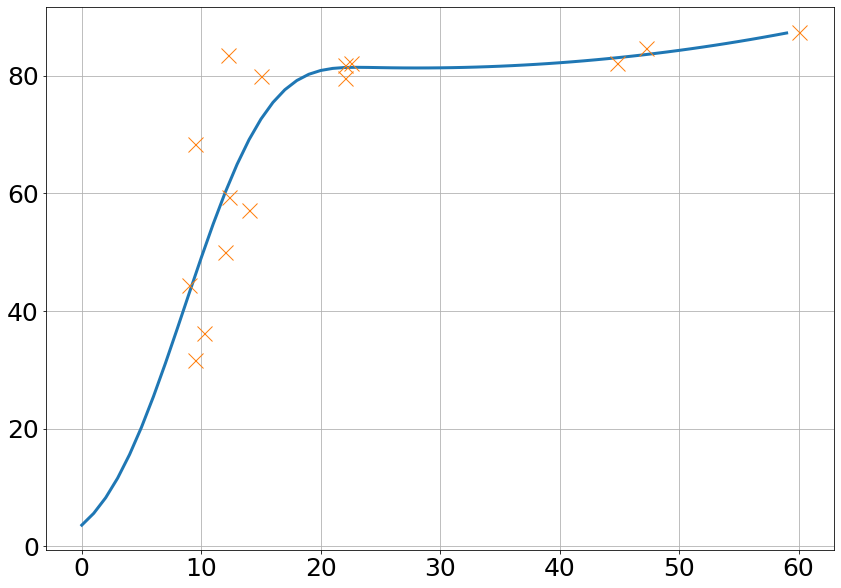

[19.09325981 14.12610015 73.99999999]


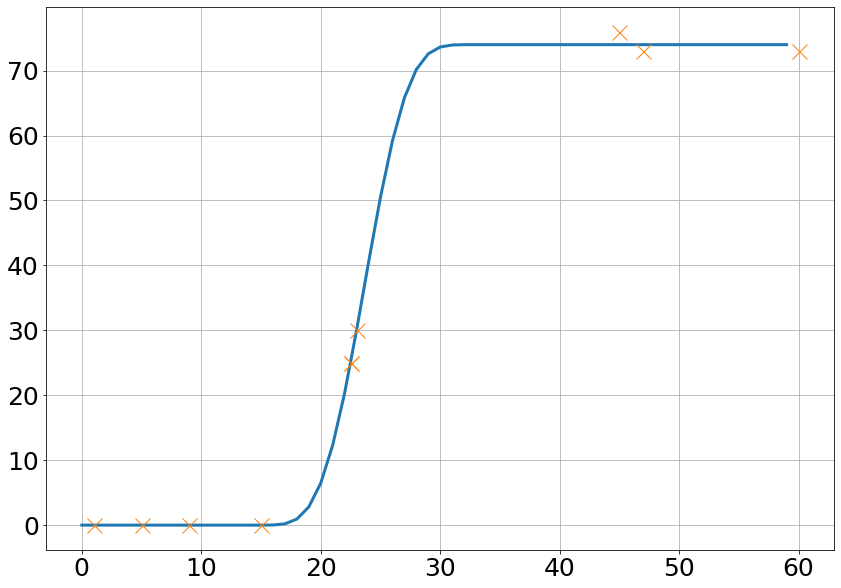

<Figure size 1017.36x718.934 with 0 Axes>

In [5]:
from scipy.special import comb

def smoothstep(x, width, dx, a):
    _x = np.clip((x - dx) / width, 0, 1)

    result = 0
    N = 5
    for n in range(0, N + 1):
         result += comb(N + n, n) * comb(2 * N + 1, N - n) * (-_x) ** n

    result *= _x ** (N + 1)

    return a * result

def myfit(x, a, b, c, d, e):
    return smoothstep(x, a, b, 1) * (c + d * x + e * x**2)

data = np.array([
    [12.3, 5.], [9.5, 6.5], [9.0, 5.],
    [15.0, 3.], [12.2, 2.], [9.5, 3.0], 
    [60., 7.5], [47.2, 7.2], [44.8, 8.],
    [14., 6.], [10.2, 6.5], [12., 6.],
    [22.5, 4.], [22., 4.], [22., 4.5]])
    #[25., 1.5], [30., 1.5]])
popt, _ = curve_fit(myfit, data[:,0], 100 - 100 * data[:,1] / data[:,0], 
                   p0=[10, 10, 0, 10, 20])
print(popt)
plt.plot(np.arange(60), myfit(np.arange(60), *popt))
plt.plot(data[:,0], 100 - 100 * data[:,1] / data[:,0], "x", markersize=15)
plt.show()
plt.clf()

data = np.array([
    [1., 0.], [5., 0.], [9., 0.], [15., 0.],
    [45., 76.], [47., 73.], [60., 73.],
    [22.5, 25.], [23., 30.], [22.5, 25.]])
popt, _ = curve_fit(smoothstep, data[:,0], data[:,1], p0=[10, 20, 80])
print(popt)
plt.plot(np.arange(60), smoothstep(np.arange(60), *popt))
plt.plot(data[:,0], data[:,1], "x", markersize=15)
plt.show()
plt.clf()

#for i in data[:,0]:
#    print(i * (1  - (-3.78 + 4.64 * i) / 100))